<A HREF="https://www.geeksforgeeks.org/emotion-classification-using-nrc-lexicon-in-python/">G4G Emotion Classification using NRC Lexicon</A><P>
    <A HREF="https://github.com/metalcorebear/NRCLex">NRC Lexicon</A>

In [36]:
#!pip3 install NRCLex
#!python3 -m textblob.download_corpora

In [9]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
import os # to check if directory exists and create it if it doesn't
from datetime import datetime # to parse speech date
from nrclex import NRCLex
import numpy as np

In [2]:
# Load up the files
#path = './DataUCSB/'
#path = './Data/'
#list_of_files = []

#for root, dirs, files in os.walk(path):
#    for file in files:
#        if file.endswith('.txt'):
#            list_of_files.append(os.path.join(root,file))

list_of_files = ['./Data/barackobamabostonmarathonexplosionsfirststatement.txt',
                 './NYTimes/04-16-2013-BostonMarathon.txt', 
                 './WSJ/04-16-2013-BostonMarathon.txt']
speeches = []
for file in list_of_files:
    with open(file, encoding='utf-8') as f:
        text = f.read()
    speeches.append(text)

In [3]:
emotions = []
for i in range(len(speeches)):
    emotions.append(NRCLex(speeches[i]))

In [4]:
emotions

Sr.	Method	Description<BR>
1	emotion.words 	        Return words list.<BR>
2	emotion.sentences	     Return sentences list.<BR>
3	emotion.affect_list	Return affect list.<BR>
4	emotion.affect_dict	Return affect dictionary.<BR>
5	emotion.raw_emotion_scores	Return raw emotional counts.<BR>
6	emotion.top_emotions	Return highest emotions.<BR>
7	emotion.affect_frequencies	Return affect frequencies.<BR>

In [5]:
[emotion.affect_frequencies for emotion in emotions] 

[{'fear': 0.07766990291262135,
  'anger': 0.019417475728155338,
  'anticip': 0.0,
  'trust': 0.20388349514563106,
  'surprise': 0.019417475728155338,
  'positive': 0.3300970873786408,
  'negative': 0.10679611650485436,
  'sadness': 0.06796116504854369,
  'disgust': 0.019417475728155338,
  'joy': 0.08737864077669903,
  'anticipation': 0.06796116504854369},
 {'fear': 0.16216216216216217,
  'anger': 0.11056511056511056,
  'anticip': 0.0,
  'trust': 0.11547911547911548,
  'surprise': 0.07125307125307126,
  'positive': 0.11302211302211303,
  'negative': 0.1891891891891892,
  'sadness': 0.08353808353808354,
  'disgust': 0.036855036855036855,
  'joy': 0.03194103194103194,
  'anticipation': 0.085995085995086},
 {'fear': 0.17209302325581396,
  'anger': 0.08837209302325581,
  'anticip': 0.0,
  'trust': 0.11162790697674418,
  'surprise': 0.06511627906976744,
  'positive': 0.11162790697674418,
  'negative': 0.19534883720930232,
  'sadness': 0.08837209302325581,
  'disgust': 0.05116279069767442,
  

In [6]:
import matplotlib
import matplotlib.pyplot as plt # pyplot has bar charts
%matplotlib notebook

<A HREF="https://matplotlib.org/cheatsheets/">Matplotlib cheat sheets</A>

<IPython.core.display.Javascript object>


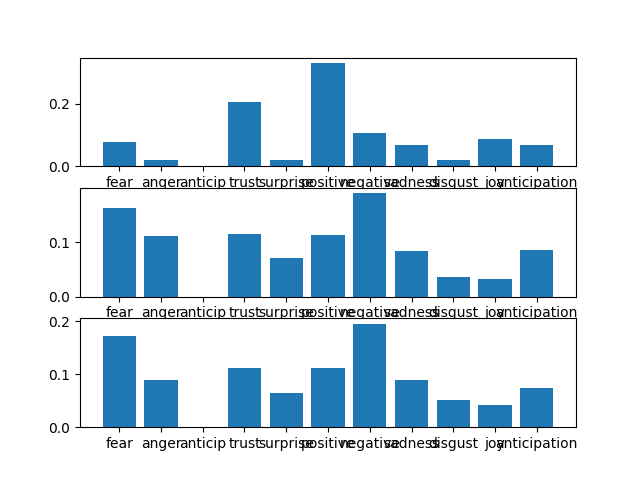

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
names = list(emotions[0].affect_frequencies.keys())

values0 = list(emotions[0].affect_frequencies.values())
ax1.bar(range(len(emotions[0].affect_frequencies)), values0, tick_label=names)

values1 = list(emotions[1].affect_frequencies.values())
ax2.bar(range(len(emotions[1].affect_frequencies)), values1, tick_label=names)

values2 = list(emotions[2].affect_frequencies.values())
ax3.bar(range(len(emotions[2].affect_frequencies)), values2, tick_label=names)

plt.show()

<IPython.core.display.Javascript object>


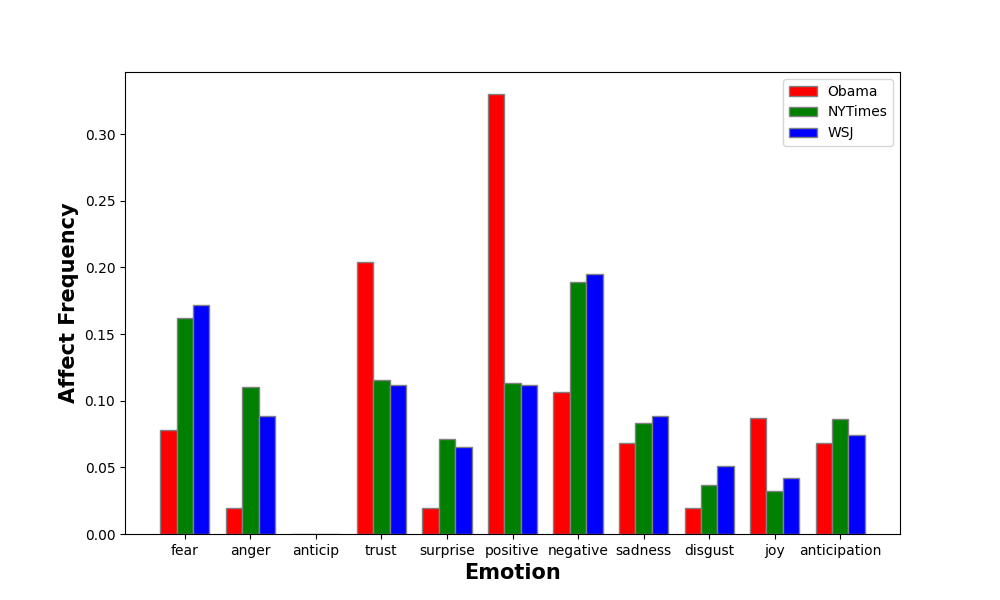

In [11]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
#
names = list(emotions[0].affect_frequencies.keys())
# Values
values0 = list(emotions[0].affect_frequencies.values())
values1 = list(emotions[1].affect_frequencies.values())
values2 = list(emotions[2].affect_frequencies.values())

# Set position of bar on X axis
br1 = np.arange(len(emotions[0].affect_frequencies))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, values0, color ='r', width = barWidth,
        edgecolor ='grey', label ='Obama')
plt.bar(br2, values1, color ='g', width = barWidth,
        edgecolor ='grey', label ='NYTimes')
plt.bar(br3, values2, color ='b', width = barWidth,
        edgecolor ='grey', label ='WSJ')

# Adding Xticks
plt.xlabel('Emotion', fontweight ='bold', fontsize = 15)
plt.ylabel('Affect Frequency', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(emotions[0].affect_frequencies))],names)

plt.legend()
plt.show()

In [46]:
# Load Files
def getfilenames(path):
    list_of_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.txt'):
                list_of_files.append(os.path.join(root,file))
    return(list_of_files)


def loadfiles(path):
    list_of_files = getfilenames(path)
    texts = []
    returnlist = []
    for file in list_of_files:
        # There's something in a NYTimes file that needs iso-8859-1 encoding
        with open(file, encoding='iso-8859-1') as f:
            text = f.read()
        returnlist.append([re.sub('\.\/([^;]*)\/', '', file), text])
    returnlist = pd.DataFrame (returnlist, columns = ['file', 'text'])
    return(returnlist)

<A HREF="https://regexr.com/">RegExr</A><BR>
    <A HREF="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas cheat sheet</A>

In [47]:
wsj = loadfiles('./WSJ/')

In [48]:
nyt = loadfiles('./NYTimes/')

In [80]:
oba = loadfiles('./speeches/')

In [81]:
df = pd.merge(wsj, nyt, how='inner', on='file', suffixes=('_wsj', '_nyt'))

In [82]:
df = pd.merge(df, oba, how='inner', on='file', suffixes=('', '_oba'))

In [95]:
df['emo_wsj'] = [NRCLex(text) for text in df['text_wsj']]
df['emo_nyt'] = [NRCLex(text) for text in df['text_nyt']]
df['emo_oba'] = [NRCLex(text) for text in df['text']]

In [102]:
# have 10 emos for 11 articles/speeches... how to plot them? hmmmmm.....
[emotion.affect_frequencies.values() for emotion in df['emo_wsj']]

[dict_values([0.05555555555555555, 0.013888888888888888, 0.0, 0.19444444444444445, 0.041666666666666664, 0.2916666666666667, 0.1111111111111111, 0.041666666666666664, 0.0, 0.05555555555555555, 0.19444444444444445]),
 dict_values([0.034482758620689655, 0.034482758620689655, 0.0, 0.2413793103448276, 0.034482758620689655, 0.3620689655172414, 0.06896551724137931, 0.0, 0.0, 0.08620689655172414, 0.13793103448275862]),
 dict_values([0.07868852459016394, 0.04918032786885246, 0.0, 0.18360655737704917, 0.009836065573770493, 0.24918032786885247, 0.18032786885245902, 0.09508196721311475, 0.009836065573770493, 0.04918032786885246, 0.09508196721311475]),
 dict_values([0.15172413793103448, 0.14482758620689656, 0.0, 0.0896551724137931, 0.017241379310344827, 0.18620689655172415, 0.22413793103448276, 0.04827586206896552, 0.034482758620689655, 0.02413793103448276, 0.07931034482758621]),
 dict_values([0.0945945945945946, 0.06756756756756757, 0.0, 0.12162162162162163, 0.04054054054054054, 0.229729729729729

In [ ]:
'fear': 0.07766990291262135,
  'anger': 0.019417475728155338,
  'anticip': 0.0,
  'trust': 0.20388349514563106,
  'surprise': 0.019417475728155338,
  'positive': 0.3300970873786408,
  'negative': 0.10679611650485436,
  'sadness': 0.06796116504854369,
  'disgust': 0.019417475728155338,
  'joy': 0.08737864077669903,
  'anticipation': 0.06796116504854369},
    
    emo_wsj